In [1]:
!pip install rioxarray geopandas earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 79.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 89.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 68.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 78.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 12.2 MB/s eta 0:00:00
 

In [2]:
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import rioxarray as rxr 
import geopandas as gpd 
import earthpy as et 
import earthpy.plot as ep 
import earthpy.spatial as es 


In [4]:
data = et.data.get_data("cold-springs-fire")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

Extracted output to /home/codespace/earth-analytics/data/cold-springs-fire/.


In [5]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["axes.titlesize"] = 20

In [6]:
naip_csf_path = os.path.join("cold-springs-fire", "naip", "m_3910505_nw_13_1_20150919", "crop", "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)

naip_csf 

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 162MB
[40478496 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0

In [7]:
naip_csf.shape

(4, 2312, 4377)

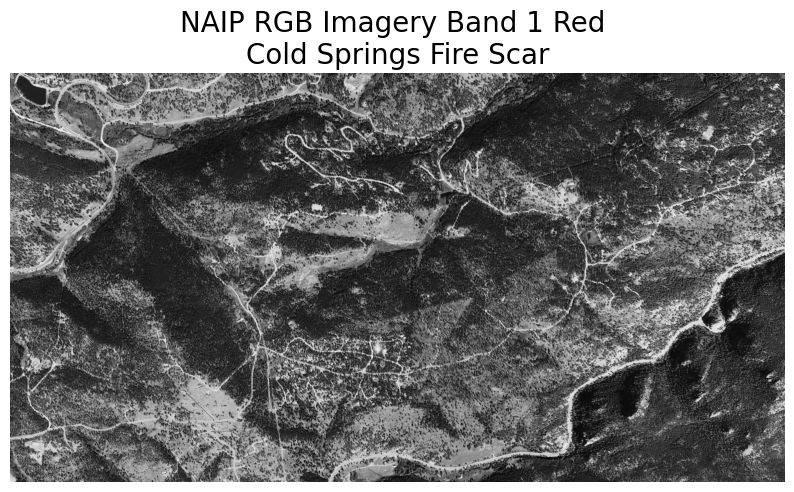

In [8]:
fig, ax = plt.subplots() 

ax.imshow(naip_csf[0], cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")

ax.set_axis_off()

plt.show()

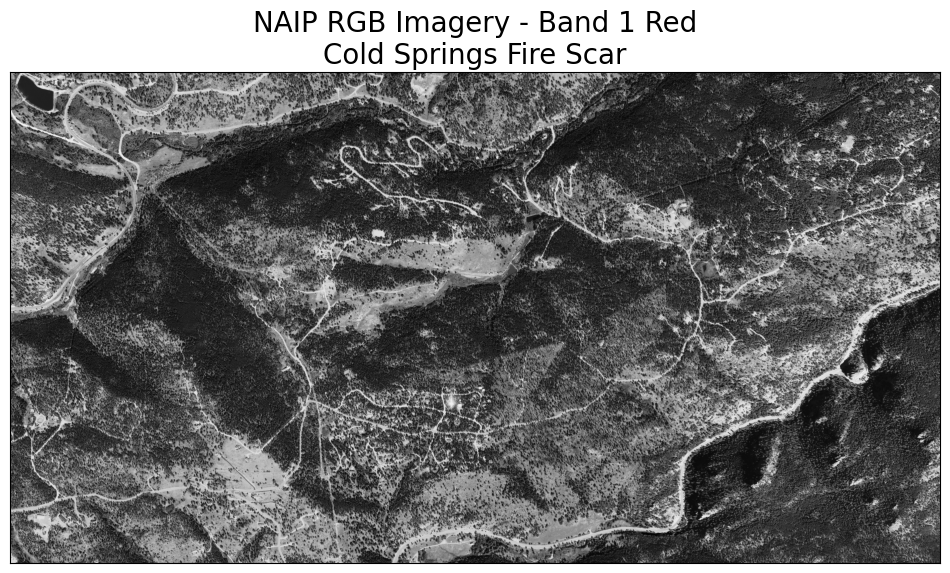

In [9]:
ep.plot_bands(naip_csf[0], title="NAIP RGB Imagery - Band 1 Red\nCold Springs Fire Scar", cbar=False)
plt.show()

In [10]:
naip_csf.band

<xarray.DataArray 'band' (band: 4)> Size: 32B
array([1, 2, 3, 4])
Coordinates:
  * band         (band) int64 32B 1 2 3 4
    spatial_ref  int64 8B 0

In [11]:
naip_csf.min()

<xarray.DataArray ()> Size: 4B
array(17., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0

In [12]:
naip_csf.max()

<xarray.DataArray ()> Size: 4B
array(242., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0

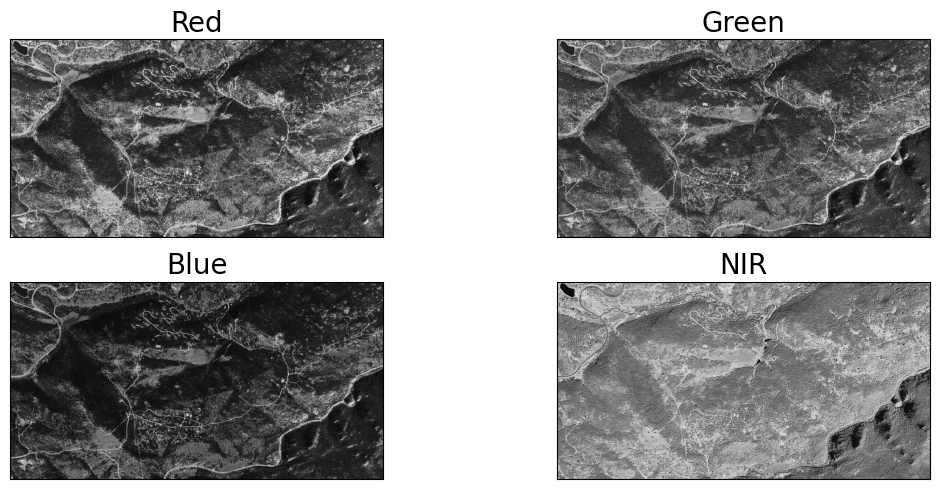

In [16]:
titles = ["Red", "Green", "Blue", "NIR"]

ep.plot_bands(naip_csf, figsize=(12,5), cols=2, title=titles, cbar=False)

plt.show()

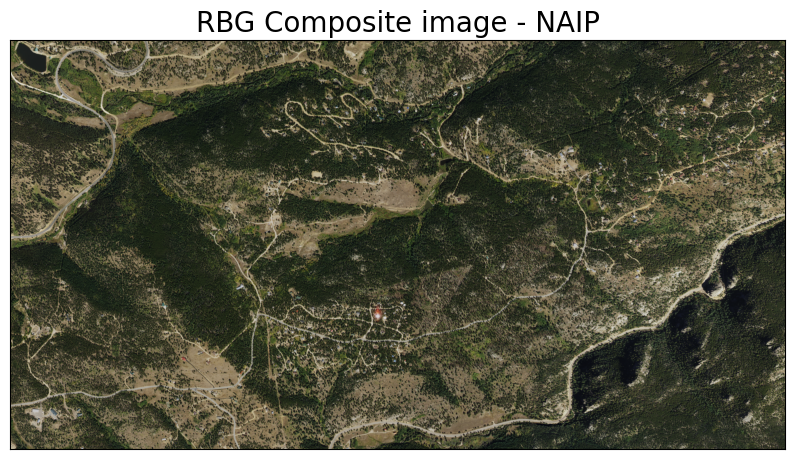

In [17]:
ep.plot_rgb(naip_csf.values, rgb=[0,1,2], title="RBG Composite image - NAIP")

plt.show()

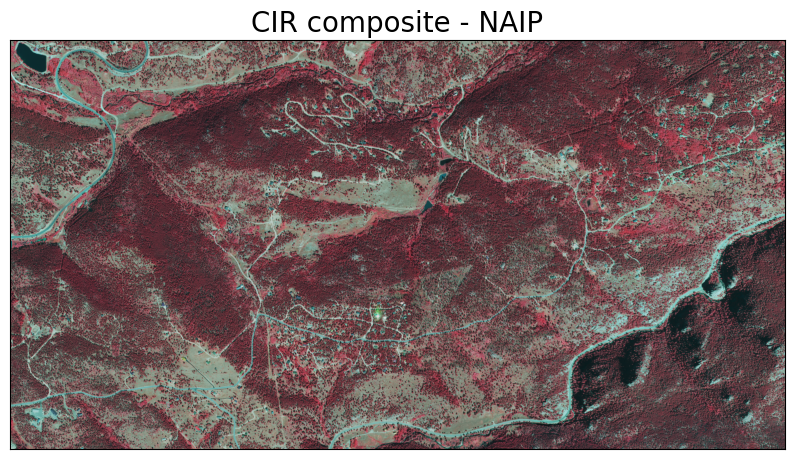

In [18]:
ep.plot_rgb(naip_csf.values, rgb=[3, 0, 1], title="CIR composite - NAIP")

plt.show()

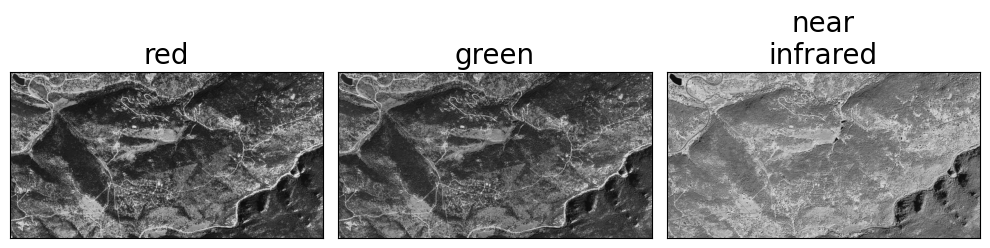

In [19]:
titles = ['red', 'green', 'near\ninfrared']
ep.plot_bands(naip_csf[[0, 1, 3]],
              figsize=(10,  7),
              title=titles,
              cbar=False)
plt.show()

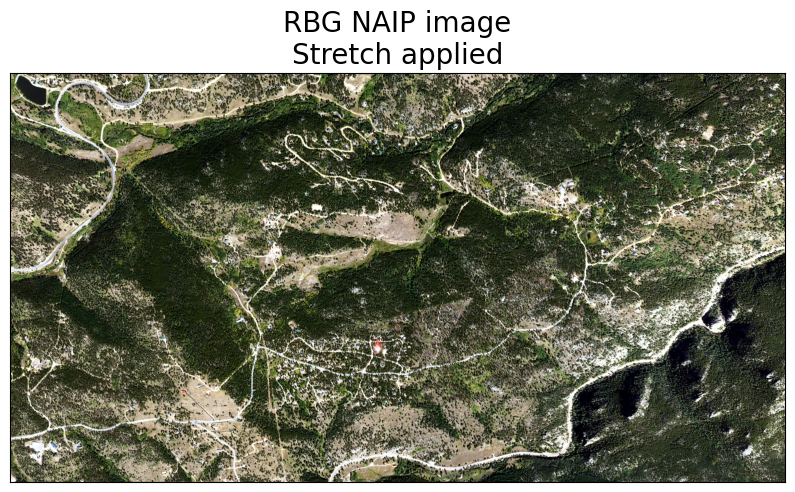

In [20]:
band_indices = [0,1,2]

ep.plot_rgb(naip_csf.values, rgb=band_indices, title="RBG NAIP image\nStretch applied", stretch=True)

plt.show()

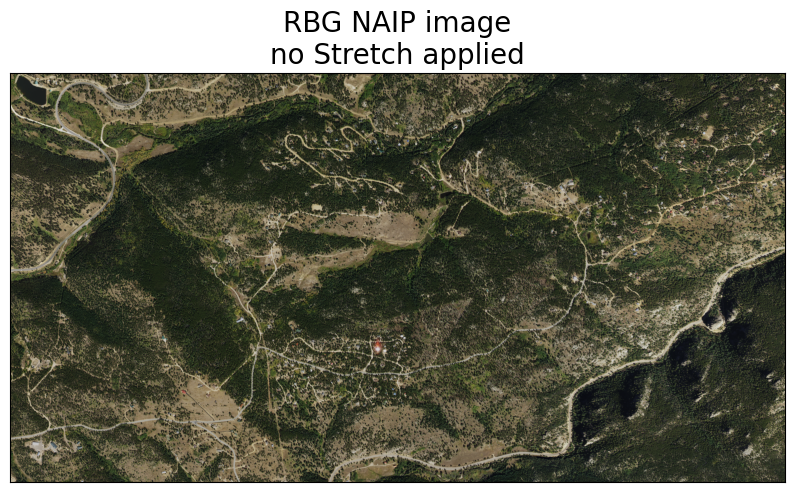

In [21]:
band_indices = [0,1,2]

ep.plot_rgb(naip_csf.values, rgb=band_indices, title="RBG NAIP image\nno Stretch applied")

plt.show()

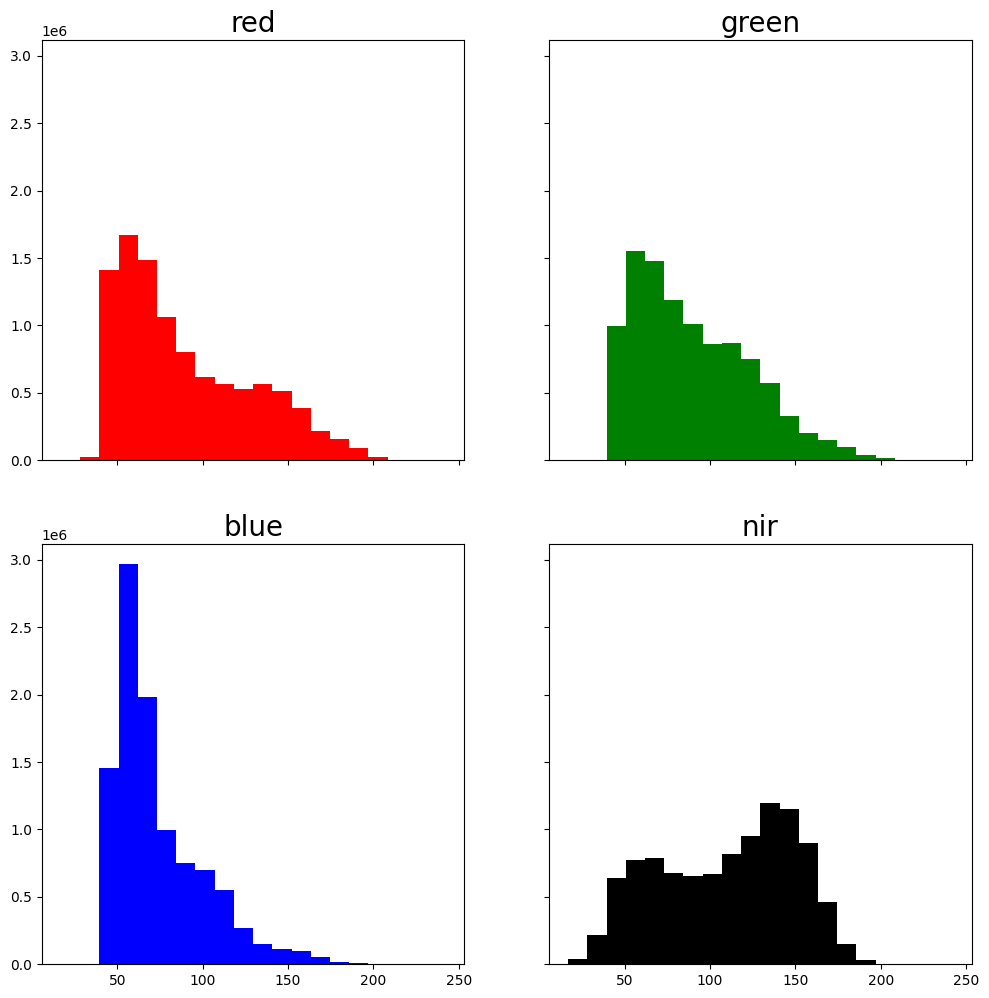

In [22]:
colors = ["r", "g", "b", "k"]
titles = ["red", "green", "blue", "nir"]

ep.hist(naip_csf.values, colors=colors, title=titles, cols=2)

plt.show()